In [120]:
import sys, os
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c
import importlib
import tools

In [121]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [122]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [123]:
nm = 1e-9
um = 1e-6

In [124]:
icApi = lumapi.INTERCONNECT()

In [125]:
icApi.switchtolayout()
icApi.deleteall()

In [126]:
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.set('number of input ports', 2)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

<h1>Ideal case</h1>

In [127]:
icApi.addelement('Double Bus Ring Resonator')
icApi.set('name', 'ring1')

In [128]:
#positions
icApi.setposition('ona1',0,0)
icApi.setposition('ring1',25,300)

In [129]:
#conections
#creating the ring resonator
icApi.connect('ring1','port 2','ona1','output')
icApi.connect('ring1','port 1','ona1','input 2')
icApi.connect('ring1','port 4','ona1','input 1')

1.0

<h2>FSR for the ideal case</h2>

the values for ng and neff used here were determined by previous simulations (check mzi repository)

In [130]:
ng = 4.355
neff = 2.355
lambda0 = 1550*nm
FSR_values = [1,10,20]
Lr = []
for FSR in FSR_values:
    Lr.append((lambda0**2)/(ng*FSR*nm))

In [131]:
a = (82.70*um - 20*um - 2*np.pi*5*um)/um
print(a)

31.28407346410208


In [132]:
#ring simulated parameters
icApi.set('effective index 1', neff)
icApi.set('effective index 2', neff)
icApi.set('group index 1', ng)
icApi.set('group index 2', ng)

<h2>1nm simulation</h2>

In [141]:
#importlib.reload(tools)
my_dict = tools.ringData(10,1,ng,1e-9)
print(my_dict['K'], my_dict['L'][0]/um)

[np.float64(0.44428829381583657), np.float64(0.44428829381583657), np.float64(0.09869604401089356)] 551.6647531572903


In [134]:
icApi.switchtolayout()
icApi.select('ring1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('coupling coefficient 1 1', my_dict['K'][0])
icApi.set('coupling coefficient 1 2', my_dict['K'][0])
icApi.set('length', Lr[0])

In [135]:
icApi.save('IdealRingResonator_1nm')
icApi.run()

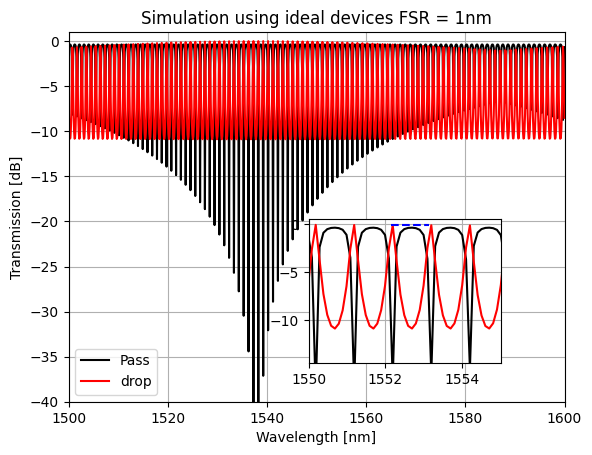

In [136]:
#coupling values -> 0.4
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='drop')

plt.xlim(1500, 1600)
plt.ylim(-40, 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 1nm')
plt.legend()
#zooming to see the FSR on the transmission graph
zoom = plt.axes([0.5,0.19,0.3,0.3])
zoom.set_xlim(1550, 1555)
zoom.set_ylim(-14.5,0.5)
zoom.grid()
zoom.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black')
zoom.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red')
zoom.hlines(-0.1,xmin=1552.15,xmax=1553.15, color='blue',linestyles='dashed')
plt.savefig('Simulation using ideal devices FSR = 1nm.png')

<h2>10nm simulation</h2>

In [147]:
#importlib.reload(tools)
my_dict = tools.ringData(15,1,ng,10e-9)
print(my_dict['K'], my_dict['L'][0]/um)

[np.float64(0.2961921958772244), np.float64(0.2961921958772244), np.float64(0.04386490844928603)] 55.166475315729045


In [148]:
icApi.switchtolayout()
icApi.select('ring1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', Lr[1])
icApi.set('coupling coefficient 1 1', my_dict['K'][0])
icApi.set('coupling coefficient 1 2', my_dict['K'][0])

In [149]:
icApi.save('IdealRingResonator_10nm')
icApi.run()

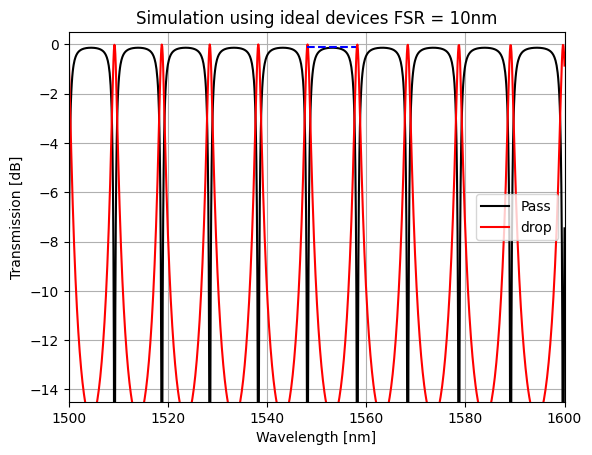

In [150]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='drop')
plt.legend()
fsrh=1548
plt.hlines(-0.1,xmin=fsrh,xmax=fsrh+10, color='blue',linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-14.5, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 10nm')
plt.savefig('Simulation using ideal devices FSR = 10nm.png')

<h2>20nm simulation</h2>

In [156]:
#importlib.reload(tools)
my_dict = tools.ringData(15,1,ng,20e-9)
print(my_dict['K'], my_dict['L'][0]/um)

[np.float64(0.2961921958772244), np.float64(0.2961921958772244), np.float64(0.04386490844928603)] 27.583237657864522


In [152]:
icApi.switchtolayout()
icApi.select('ring1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', Lr[2])

In [153]:
icApi.select('ring1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', Lr[2])
icApi.set('coupling coefficient 1 1', my_dict['K'][0])
icApi.set('coupling coefficient 1 2', my_dict['K'][0])

In [154]:
icApi.save('IdealRingResonator_20nm')
icApi.run()

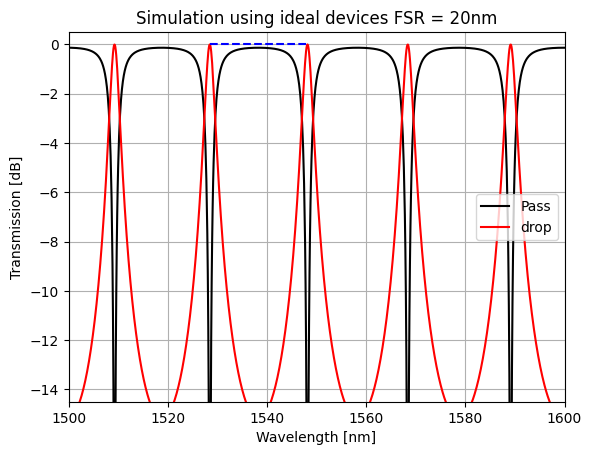

In [155]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black',label='Pass')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='drop')
plt.legend()
fsrh_20 = 1528.5
plt.hlines(0,xmin=fsrh_20,xmax=fsrh_20+20, color='blue',linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-14.5, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 20nm')
plt.savefig('Simulation using ideal devices FSR = 20nm.png')

<h1>20nm using ideal series rings</h1>

In [160]:
icApi.switchtolayout()
icApi.deleteall()

In [161]:
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.set('number of input ports', 2)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

In [162]:
#positions
icApi.setposition('ona1',0,0)

In [163]:
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'c1')
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'c2')
icApi.addelement('Waveguide Coupler')
icApi.set('name', 'c3')
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg1')
icApi.set('Rotated', 45)
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg2')
icApi.set('Rotated', 45)
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg3')
icApi.set('Rotated', 45)
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg4')
icApi.set('Rotated', 45)

In [164]:
#positioning elements
icApi.setposition('c1',45,200)
icApi.setposition('c2',45,800)
icApi.setposition('c3',45,500)
icApi.setposition('wg1',150,650)
icApi.setposition('wg2',-90,650)
icApi.setposition('wg3',150,350)
icApi.setposition('wg4',-90,350)

In [165]:
#connections
#upper ring
icApi.connect('c1','port 2','wg4','port 1')
icApi.connect('c1','port 4','wg3','port 1')
icApi.connect('c3','port 1','wg4','port 2')
icApi.connect('c3','port 3','wg3','port 2')
#lower ring
icApi.connect('c3', 'port 2', 'wg2', 'port 1')
icApi.connect('c3', 'port 4', 'wg1', 'port 1')
icApi.connect('c2', 'port 1', 'wg2', 'port 2')
icApi.connect('c2', 'port 3', 'wg1', 'port 2')
#ona connections
icApi.connect('ona1','output','c2','port 2')
icApi.connect('c1','port 1','ona1','input 2')

1.0

In [172]:
#FSR/B = 30 makes it looks a bit more ideal
my_dict = tools.ringData(10,2,ng,20e-9)
print(my_dict['K'][2], my_dict['L'])

0.04934802200544681 [8.274971297359357e-05, 5.5166475315729044e-05]


In [167]:
icApi.switchtolayout()
#ring parameters
L = [l/2 for l in my_dict['L'] for i in range(2)]
#setting waveguide length
for i in range(0, len(L),1):
    icApi.select('wg'+str(i+1))
    icApi.set('length', L[i])
    icApi.set('effective index 1', neff)
    icApi.set('group index 1', ng)
#setting waveguide coupling coefficients
for i in range(0,3,1):
    if i <= 1:
        icApi.select('c'+str(i+1))
        icApi.set('coupling coefficient 1', my_dict['K'][0])
    if i == 2:
        icApi.select('c'+str(i+1))
        icApi.set('coupling coefficient 1', my_dict['K'][2])

In [168]:
icApi.save('20nmIdealSeriesRings')
icApi.run()

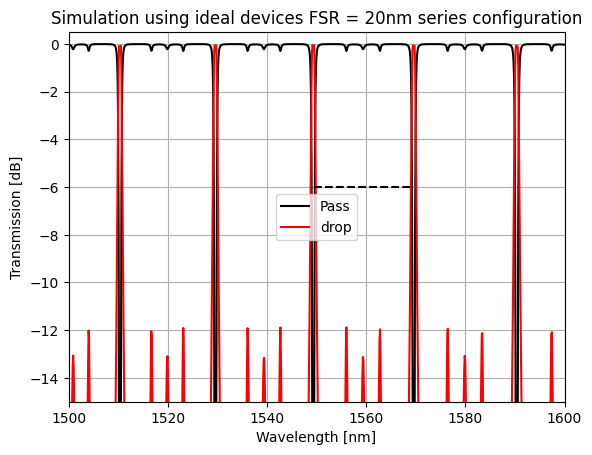

In [171]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
data2 = icApi.getresult('ona1', 'input 2/mode 1/gain')
plt.plot(data['wavelength'] / nm, data['TE gain (dB)'], color='black', label='Pass')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='red', label='drop')
plt.legend()
fsrh_20 = 1549.5
plt.hlines(-6, xmin=fsrh_20, xmax=fsrh_20 + 20, color='black', linestyles='dashed')
plt.xlim(1500, 1600)
plt.ylim(-15, 0.5)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 20nm series configuration')
plt.savefig('Simulation using ideal devices FSR = 20nm series configuration.png')